# Make Flying Safer by Choosing the Right Plane

![How-to-Choose](./images/cessna_vs_piper.jpg)

## Overview

This project focuses on determining the optimal aircraft investment for our newly established flight school, with a paramount emphasis on minimizing risk and prioritizing safety. As we embark on this venture, the choice of aircraft is pivotal to the overall safety and success of our flight operations.

## Business Problem

![img]()

The Austin Animal Shelter may be able to improve their resource allocation to both reduce costs and ensure that the center has staff and space to care for the animals brought to them. Doing so will allow the Austin Animal Shelter to better serve its clients while also freeing up resources to expand the scope of services they can offer. Using AAC's animal intake and outcome data, I describe patterns in intakes, stays, and exits to anticipate AAC's outreach, space, and staffing needs for supporting sheltered animals.

## Data Understanding

![img2]()

[NTSB aviation accident](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses/data?select=AviationData.csv) 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load in data
df=pd.read_csv('Data/AviationData.csv', encoding='latin-1', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### Aviation Accident Data

The aviation dataset includes accident records from October 1948 to December 2022, and includes a wide variety of incidents, locations, aircraft types, and injury severities.

In [5]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [6]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df['Event.Date'].describe()

count                   88889
unique                  14782
top       1982-05-16 00:00:00
freq                       25
first     1948-10-24 00:00:00
last      2022-12-29 00:00:00
Name: Event.Date, dtype: object

In [7]:
df['Location'].value_counts()

ANCHORAGE, AK           434
MIAMI, FL               200
ALBUQUERQUE, NM         196
HOUSTON, TX             193
CHICAGO, IL             184
                       ... 
KILLIAN, LA               1
Goshen, NY                1
Mauterndorf, Austria      1
McKinley Park, AK         1
SHENZHEN, China           1
Name: Location, Length: 27758, dtype: int64

In [8]:
df['Country'].value_counts()

United States     82248
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
                  ...  
Pacific Ocean         1
Ivory Coast           1
Gibraltar             1
Benin                 1
Yemen                 1
Name: Country, Length: 219, dtype: int64

In [9]:
df['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
ULTR                     1
Rocket                   1
Name: Aircraft.Category, dtype: int64

In [10]:
df['Make'].value_counts()

Cessna                  22227
Piper                   12029
CESSNA                   4922
Beech                    4330
PIPER                    2841
                        ...  
Mudry                       1
UNIVERSITY OF KANSAS        1
James Olivier               1
MCKENNA GLEN R              1
Sea & Air Sales             1
Name: Make, Length: 8237, dtype: int64

In [11]:
df['Model'].value_counts()

152              2367
172              1756
172N             1164
PA-28-140         932
150               829
                 ... 
Sportsman 2+2       1
NIMBUS 4DM          1
CAN-56              1
Discus B            1
LC42 - 550FG        1
Name: Model, Length: 12318, dtype: int64

In [12]:
df['Injury.Severity'].value_counts()

Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(114)        1
Fatal(123)        1
Fatal(80)         1
Fatal(125)        1
Fatal(199)        1
Name: Injury.Severity, Length: 109, dtype: int64

## Data Preparation

### Data Cleaning

For the aviation accident dataset, we it easier to work with by investigation and cleaning up certain columns and dropping unnecessary columns.

In [13]:
# First we want to identify locations that are only applicable to where we would operate:
# The continental United States.

#First lets drop rows we don't have have information on the location:
#The location includes infomation about where in the Country the accident occured.
df.dropna(subset=['Location', 'Country'], inplace=True)

# Now we only want to view locations that are apart of the continental United States.
df = df[df['Country'].str.lower() == 'united states']

In [14]:
#Dropping rows if the make or model is missing.
#We want to identify which plane is the best investment and can't do so if this info is missing.
df.dropna(subset=['Make', 'Model'], inplace=True)

In [15]:
# Drop unnecessary columns
# Columns to drop
drop_columns = ['Latitude', 'Longitude', 'FAR.Description', 'Schedule', 'Air.carrier', 'Publication.Date']
# Drop columns in the specified list
df = df.drop(columns=drop_columns)

In [16]:
# Extracting year, month, and day
df['year'] = df['Event.Date'].dt.year
df['month'] = df['Event.Date'].dt.month
df['day'] = df['Event.Date'].dt.day

In [17]:
# Making the make and model column value names easier to use

# Here we are making the 'Make' column consistent
df['Make']=df['Make'].str.lower()

In [18]:
# Here we are making the 'Model' column consistent by removing spaces, -, and _.
# Function to process a single value
def process_category(value):
    # Convert to lowercase, remove spaces, dashes, and underscores, and combine all words
    return ''.join(value.lower().replace(' ', '').replace('-', '').replace('_', ''))

df['Model'] = df['Model'].apply(process_category)

In [19]:
# Here we are creating a new column that combines Make and Model
df['Make/Model'] = df['Make']+" "+df['Model']
df['Make/Model'].value_counts()

cessna 152            2322
cessna 172            1634
cessna 172n           1144
piper pa28140          978
cessna 172m            802
                      ... 
airbus a350              1
phantom phantom          1
ganjoo amit sonex        1
alderfer gyroplane       1
smith monnettmoni        1
Name: Make/Model, Length: 14886, dtype: int64

In [20]:
#Here we are seeing if the make/model for a specific aircraft category matches another row where aircraft category is null.

# 1. df['Aircraft.Category'].isna(): 
#This part creates a boolean mask where it checks if the values in the 'Aircraft.Category' column are NaN. 
#It returns True for NaN values and False otherwise.

# 2. df['Make/Model'].isin(df[df['Aircraft.Category'] == 'Airplane']['Make/Model']): 
# This part creates another boolean mask. It checks if the values in the 'Make/Model' 
# column are present in the 'Make/Model' column of rows where 'Aircraft.Category' is equal to 'Airplane'. 
# It returns True for rows where the 'Make/Model' is in the list of 'Make/Model' values for 'Airplane'.

# 3. mask = df['Aircraft.Category'].isna() & ...: 
# This line combines the two boolean masks using the bitwise AND (&) operator. 
# The resulting mask will be True for rows where 'Aircraft.Category' is NaN and the corresponding 'Make/Model' 
# is in the list of 'Make/Model' values for 'Airplane'.

Airplane_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'Airplane']['Make/Model'])
Helicopter_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'Helicopter']['Make/Model'])
Glider_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'Glider']['Make/Model'])
Balloon_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'Balloon']['Make/Model'])
Gyrocraft_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'Gyrocraft']['Make/Model'])
WeightShift_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'Weight-Shift']['Make/Model'])
PoweredParachute_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'Powered Parachute']['Make/Model'])
Ultralight_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'Ultralight']['Make/Model'])
Unknown_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'Unknown']['Make/Model'])
WSFT_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'WSFT']['Make/Model'])
PoweredLift_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'Powered-Lift']['Make/Model'])
Blimp_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'Blimp']['Make/Model'])
UNK_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'UNK']['Make/Model'])
ULTR_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'ULTR']['Make/Model'])
Rocket_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'Rocket']['Make/Model'])

In [21]:
#Here we are applying the condition above, and reclassfying the Aircraft category if there was a match.
df.loc[Airplane_mask, 'Aircraft.Category'] = 'Airplane'
df.loc[Helicopter_mask, 'Aircraft.Category'] = 'Helicopter'
df.loc[Glider_mask, 'Aircraft.Category'] = 'Glider'
df.loc[Balloon_mask, 'Aircraft.Category'] = 'Balloon'
df.loc[Gyrocraft_mask, 'Aircraft.Category'] = 'Gyrocraft'
df.loc[WeightShift_mask, 'Aircraft.Category'] = 'Weight-Shift'
df.loc[PoweredParachute_mask, 'Aircraft.Category'] = 'Powered Parachute'
df.loc[Ultralight_mask, 'Aircraft.Category'] = 'Ultralight'
df.loc[Unknown_mask, 'Aircraft.Category'] = 'Unknown'
df.loc[WSFT_mask, 'Aircraft.Category'] = 'WSFT'
df.loc[PoweredLift_mask, 'Aircraft.Category'] = 'Powered-Lift'
df.loc[Blimp_mask, 'Aircraft.Category'] = 'Blimp'
df.loc[UNK_mask, 'Aircraft.Category'] = 'UNK'
df.loc[ULTR_mask, 'Aircraft.Category'] = 'ULTR'
df.loc[Rocket_mask, 'Aircraft.Category'] = 'Rocket'

# New value count of Airplanes, we were able to classify ~40k new airplanes, that were previously NA
df['Aircraft.Category'].value_counts()

Airplane             64012
Helicopter            6487
Glider                1024
Balloon                433
Gyrocraft              217
Weight-Shift           162
Powered Parachute       91
Ultralight              32
Unknown                 15
WSFT                    11
Powered-Lift             7
Blimp                    5
ULTR                     1
Rocket                   1
Name: Aircraft.Category, dtype: int64

In [22]:
#Investigating the unknown aircraft category by make and model, to find any aircrafts.
unknown_aircraft_df = df[df['Aircraft.Category']=='Unknown']
unknown_aircraft_df['Make/Model'].value_counts()

mitsubishi mu300        8
rans s7                 3
quad city challenger    3
varieze ruatan          1
Name: Make/Model, dtype: int64

In [23]:
# Identifying airplanes in the unknown aircraft category and classifying them as airplanes.

unknown_condition_airplane=((df['Aircraft.Category'] == 'Unknown') & 
                   ((df['Make/Model'] == 'rans s7') | (df['Make/Model'] == 'cessna aircraft company 560xl') | 
                    (df['Make/Model'] == 'mitsubishi mu300')))
df.loc[unknown_condition_airplane, 'Aircraft.Category'] = 'Airplane'

#Now we can just drop all rows where the aircraft category is unknown since there are no more airplanes in the categorgy.

In [24]:
# Now lets investigate the NaN values in aircraft categorgy.

None_aircraft_df = df[df['Aircraft.Category'].isna()]
None_aircraft_df['Make'].value_counts()

boeing               440
cessna               317
beech                317
piper                255
mcdonnell douglas    142
                    ... 
navickas               1
toman                  1
herpst                 1
beierle                1
stump                  1
Name: Make, Length: 3942, dtype: int64

In [25]:
#Here we are assigning the variable 'airplane' to well known airplane manufactures that dont have a aircraft classification.

df.loc[(df['Aircraft.Category'].isna()) & (df['Make'] == 'boeing'), 'Aircraft.Category'] = 'Airplane'
df.loc[(df['Aircraft.Category'].isna()) & (df['Make'] == 'cessna'), 'Aircraft.Category'] = 'Airplane'
df.loc[(df['Aircraft.Category'].isna()) & (df['Make'] == 'beech'), 'Aircraft.Category'] = 'Airplane'
df.loc[(df['Aircraft.Category'].isna()) & (df['Make'] == 'beechcraft'), 'Aircraft.Category'] = 'Airplane'
df.loc[(df['Aircraft.Category'].isna()) & (df['Make'] == 'piper'), 'Aircraft.Category'] = 'Airplane'
df.loc[(df['Aircraft.Category'].isna()) & (df['Make'] == 'mcdonnell douglas'), 'Aircraft.Category'] = 'Airplane'
df.loc[(df['Aircraft.Category'].isna()) & (df['Make'] == 'douglas'), 'Aircraft.Category'] = 'Airplane'

In [26]:
#Now we drop all rows in the aircraft category column that don't equal airplane
airplane_df = df[df['Aircraft.Category'] == 'Airplane']

Now we are investigating the injurity serverity. As a flight school, our students saftey is our top priority and we want to make sure our students are in the safest plane on the market. In order to determine wether a plane is safe or not, we need to examine the survival rate, by analyzing the four injury columns (Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, and Total.Uninjured).

In [27]:
#Now we are investigating the NaN injurity serverity columns.
filtered_df = airplane_df[airplane_df['Injury.Severity'].isnull()]

# Here I am checking to make sure there are no injuries recorded in these rows.
#We are good to remove rows where the Injury Severity is null.
print(filtered_df['Total.Fatal.Injuries'].sum() == 0)
print(filtered_df['Total.Serious.Injuries'].sum() == 0)
print(filtered_df['Total.Minor.Injuries'].sum() == 0)
print(filtered_df['Total.Uninjured'].sum() == 0)

True
True
True
True


In [28]:
#Drop rows where the Injury Severity is NA, since we have no accounts of anybody being onboard.
airplane_df =airplane_df.dropna(subset=['Injury.Severity'])

In [29]:
#I'm dropping rows, where there is no information to how many passangers were on board.  
columns_to_check = ['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']
airplane_df.dropna(subset=columns_to_check, how='all', inplace=True)

In [30]:
#Now that one of the four 'columns_to_check' has a value in it, We replace those NA values with 0
airplane_df[columns_to_check] = airplane_df[columns_to_check].fillna(0)

Now we can investigate the amateur build column. We do not want to include aircrafts that are built by amateurs, so we will exclude all those rows.

In [31]:
# Amatuer built column analysis.
# First I will investigate the NA values in this column, and if the make/model matches another rows make/model, 
# replace NA value.

no_amatuer_mask = airplane_df['Amateur.Built'].isna() & airplane_df['Make/Model'].isin(airplane_df[airplane_df['Amateur.Built'] == 'No']['Make/Model'])
yes_amatuer_mask = airplane_df['Amateur.Built'].isna() & airplane_df['Make/Model'].isin(airplane_df[airplane_df['Amateur.Built'] == 'Yes']['Make/Model'])
airplane_df.loc[no_amatuer_mask, 'Amateur.Built'] = 'No'
airplane_df.loc[yes_amatuer_mask, 'Amateur.Built'] = 'Yes'

# airplane_df[airplane_df['Amateur.Built'].isnull()] 
#Only 3 NAs left, we can drop these rows as these are not planes we are interested in investigating.

# Now I'm gonna remove all rows where Amatuer built is = yes or null
condition = (airplane_df['Amateur.Built'] == 'Yes') | airplane_df['Amateur.Built'].isnull()
airplane_df = airplane_df[~condition]

In [32]:
#Checking to make sure we have No as the only option.
airplane_df['Amateur.Built'].value_counts()

No    62051
Name: Amateur.Built, dtype: int64

In [33]:
# #Now lets investigate the Aircraft.damage column.

# airplane_df['Aircraft.damage'].unique() #['Destroyed', 'Substantial', 'Minor', nan, 'Unknown']
# airplane_df['Aircraft.damage'].value_counts() #Substantial=48728 , Destroyed=13541, Minor=1984, Unknown=74
# airplane_df[airplane_df['Aircraft.damage'].isnull()] #1932 rows that are NAN.

# airplane_df[airplane_df['Aircraft.damage'] == 'Substantial'] # There are some rows where there are only unijured entries.
# #Therefor3 it is not okay to assume that the aircraft was minor damage if there are only uninjured passangers
# airplane_df[airplane_df['Aircraft.damage'] == 'Destroyed']
# airplane_df[airplane_df['Aircraft.damage'] == 'Minor']
# airplane_df[airplane_df['Aircraft.damage'] == 'Unknown']

# #Initial hypothesis: If everyone onboard dies, can we classify the Aircraft damage as Destroyed?
# airplane_df[((airplane_df['Total.Fatal.Injuries'] > 0) &
#     (airplane_df['Total.Serious.Injuries'] == 0) &
#     (airplane_df['Total.Minor.Injuries'] == 0) &
#     (airplane_df['Total.Uninjured'] == 0) &
#     ~airplane_df['Aircraft.damage'].isna()
# )]['Aircraft.damage'].value_counts()

# #Here I am showing that even when only looking at cases where everyone dies. We still cannot conclude the damage type.
# #Therefor imputation will not work.

In [34]:
#Dropping rows where the aircraft damage is null or unknown. We should drop 2,006 rows.
airplane_df = airplane_df.dropna(subset=['Aircraft.damage'])
airplane_df = airplane_df[airplane_df['Aircraft.damage'] != 'Unknown']

In [35]:
airplane_df['Make'].value_counts()

cessna                          25557
piper                           14023
beech                            4986
mooney                           1235
grumman                          1065
                                ...  
thrush aircraft, inc.               1
weston james                        1
blue side up inc                    1
rajhamsa                            1
aeros ltd/skyranger aircraft        1
Name: Make, Length: 1008, dtype: int64

Now we want to identify the top plane make and models that are used in flight school. There is no sense in analysing a Boeing 747 as it is not a proper plane to learn how to fly in. According to the [Pilot Institute](https://pilotinstitute.com/flight-school-aircraft/) and the [Aircraft Owners and Pilots Association](https://www.aopa.org/training-and-safety/learn-to-fly/flying-for-fun/choose-where-to-train/training-aircraft-review#:~:text=Cessna%20172%3A%20The%20Cessna%20172,%2Dinjected%20four%2Dcylinder%20engines.), the top aircraft make and models used in flight school are the Cessna 172, Piper PA-28 Cherokee, Cessna 150, and Cessna 152. Given these are the most common and most affordable aircrafts compared to some of the other more expensive make and models like the Cirrus SR20/22 and Diamond DA20/40, we decided to narrow our search down to just these four planes.

### Cessna 172
![Cessna 172](./images/cessna_172.jpg)

### Piper PA-28 Cherokee
![Piper_pa28](./images/piper_pa28.jpg)

### Cessna 150
![Cessna 150](./images/cessna_150.jpg)

### Cessna 152
![Cessna 152](./images/cessna_152.jpg)

In [36]:
#The code below shows that there are more instances of piper and cessna than what we originally had caputured.
# cessna=26698
# piper=14654
# airplane_df[airplane_df['Make'].str.contains('piper', case=False, na=False)] #14,722 instances
# airplane_df[airplane_df['Make'].str.contains('cessna', case=False, na=False)] #26,756 instances

#Here I am making sure the make values for pipper and cessna is consistent throught the dataframe.
airplane_df.loc[airplane_df['Make'].str.contains('piper', case=False, na=False), 'Make'] = 'piper'
airplane_df.loc[airplane_df['Make'].str.contains('cessna', case=False, na=False), 'Make'] = 'cessna'
airplane_df['Make'].value_counts()

cessna                            25592
piper                             14071
beech                              4986
mooney                             1235
grumman                            1065
                                  ...  
weston james                          1
blue side up inc                      1
rajhamsa                              1
grumman aircraft cor-schweizer        1
aeros ltd/skyranger aircraft          1
Name: Make, Length: 988, dtype: int64

In [37]:
# To make sure we capture all the models of interest, the cessna 172 is also commonly known as “The Cessna Skyhawk”. 
# Below we replace the model name with 172 if Skyhawk occurs in the model number.
airplane_df.loc[airplane_df['Model'].str.contains('Skyhawk', case=False, na=False), 'Model'] = '172'

In [38]:
# Here I am creating a new column to classify all versions of the Pipper pa-28, cessna 152, cessna 150, and cessna 172
# so that we can aggregate each model together.
# We will leave the original model column unchanged to later analysis the differences between different versions.
# For example: cessna 150n vs cessna 150m

make_column = 'Make'
model_column = 'Model'
new_column = 'model_new'

# Create a new column 'model_new' based on conditions
airplane_df[new_column] = airplane_df.apply(
    lambda row: 'pa-28' if row[make_column] == 'piper' and 'pa28' in row[model_column].lower() else (
        '152' if row[make_column] == 'cessna' and '152' in row[model_column] else (
            '172' if row[make_column] == 'cessna' and '172' in row[model_column] else (
                '150' if row[make_column] == 'cessna' and '150' in row[model_column] else None
            )
        )
    ),
    axis=1
)

airplane_df['model_new'].value_counts()

172      6486
pa-28    4664
150      3179
152      2459
Name: model_new, dtype: int64

In [39]:
# Now we create a new dataframe where we only examine the models we are interested in purchasing.
planes_of_interest = airplane_df.dropna(subset=['model_new'])

[Cessna 150/152 History](https://cessna150152club.org/cessna-150-history/)
The Cessna 150 began production in 1957 and in 1978 Cessna introduced a revised model, the 152, with a 110 horsepower Lycoming 0-235 engine. The Lycoming was chosen to provide a long overdue increase in horsepower and make the 152 more compatible with the new 100LL fuel. The cabin was also widened slightly to make room for the increased girth of late 20th century pilots. Unlike the Model 150, there were few changes in 152s from one year to the next.

By the end of production in 1985, 31,533 Cessna 150/152s had been manufactured worldwide. More pilots have flown Cessna 150s and 152s than any other single model of airplane. Like most light plane companies in the US, Cessna stopped building light aircraft all together in the mid 1980’s because of excessive product liability lawsuits. 

Used 150s and 152s are selling for three to five times their original price. Still, by comparison, the low quantities and astronomical prices of most other airplanes make the Cessna 150 and 152 one of the few genuine bargains in private aviation. Remarkably, 60 years after production began and 35 years since it ended, more than two thirds of all Cessna 150s and 152s built are still flying.

[Cessna 172 History](https://flyfa.com/the-most-produced-aircraft-is-cessna-172-17-facts-about-cessna-172/)
For the Cessna 172, Cessna delivered the first production model in 1956 and the model is still in production today.A new Cessna 172 runs around $400,000 to purchase. However, with a new aircraft, you'll have the advantage of the latest technology and a full warranty.

[Piper PA-28 Cherokee](https://www.wikiwand.com/en/Piper_PA-28_Cherokee)
The first PA-28 received its type certificate from the Federal Aviation Administration in 1960 and the series remains in production to this day. Current models are the Warrior, Arrow, and Archer TX and LX, and the Pilot 100 and 100i.


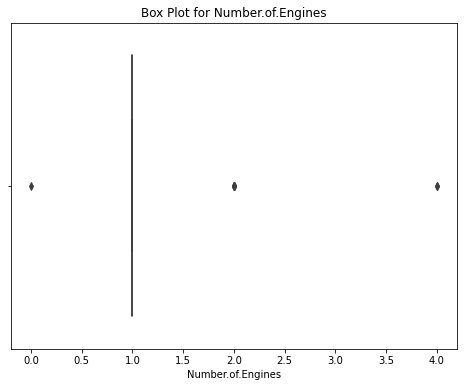

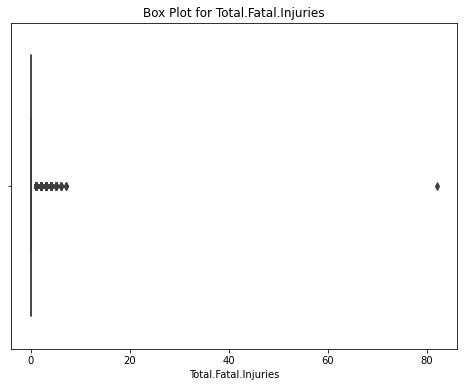

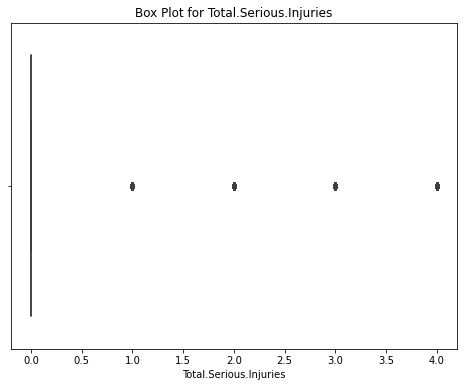

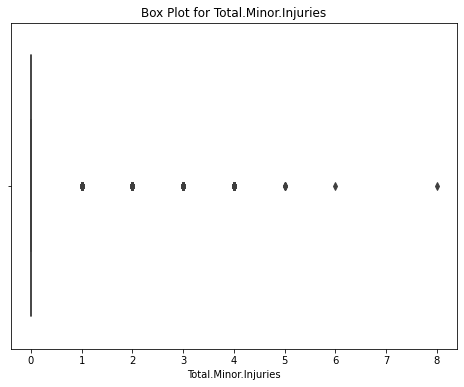

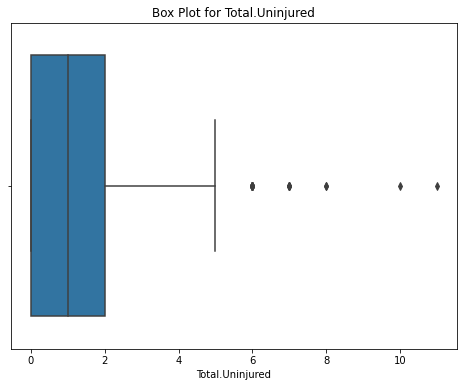

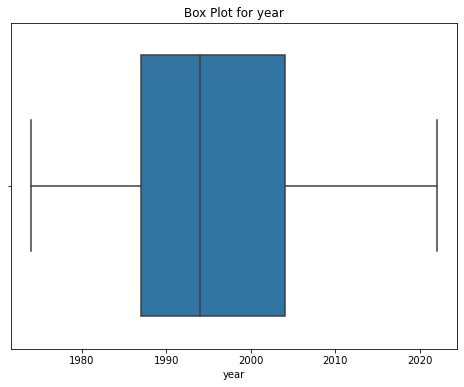

In [40]:
# List of numerical columns to look for outliers.
outlier_columns = ['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'year']

# Create a box plot for each specified column
for column in outlier_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=planes_of_interest[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

Given the infomation about production for each model and the years currently in the dataframe, we decided to only examine airplane incidents from 1986 to current. This will account for any of the last Cessna 150/152 models that were produced. 

In [41]:
#Filtering by year
planes_of_interest = planes_of_interest[(planes_of_interest['year'] >= 1986)]

#Dropping this outlier in the total fatal injuries column
planes_of_interest = planes_of_interest[planes_of_interest['Total.Fatal.Injuries'] <= 70]

To obtain a private pilot certificate in airplanes, a person must log at least 40 hours of flight time, of which at least 20 hours are flight training from an authorized instructor and 10 hours of solo flight training in the appropriate areas of operation, three hours of cross-country, three hours at night, three hours of instrument time, and other requirements specific to the category and class rating sought.

Our Buisness model consist of two stages:
1. Flight Training that is instructor lead.
2. Plane rentals for our students to log their necessary solo hours in order to obtain their pilots license.

In [42]:
# Here we are narrowing down the dataframe to only examin personnal and instructional flights incidents. 
planes_of_interest = planes_of_interest[planes_of_interest['Purpose.of.flight'].isin(['Personal', 'Instructional'])]

In [43]:
planes_of_interest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12754 entries, 13710 to 88877
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                12754 non-null  object        
 1   Investigation.Type      12754 non-null  object        
 2   Accident.Number         12754 non-null  object        
 3   Event.Date              12754 non-null  datetime64[ns]
 4   Location                12754 non-null  object        
 5   Country                 12754 non-null  object        
 6   Airport.Code            8940 non-null   object        
 7   Airport.Name            9113 non-null   object        
 8   Injury.Severity         12754 non-null  object        
 9   Aircraft.damage         12754 non-null  object        
 10  Aircraft.Category       12754 non-null  object        
 11  Registration.Number     12754 non-null  object        
 12  Make                    12754 non-null  ob

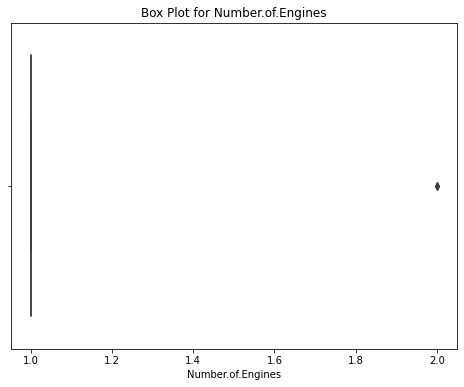

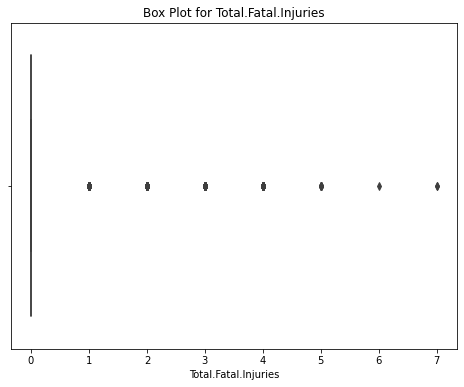

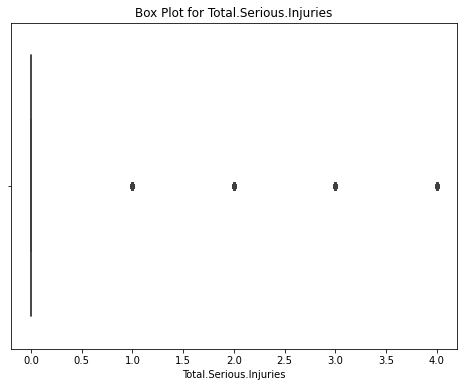

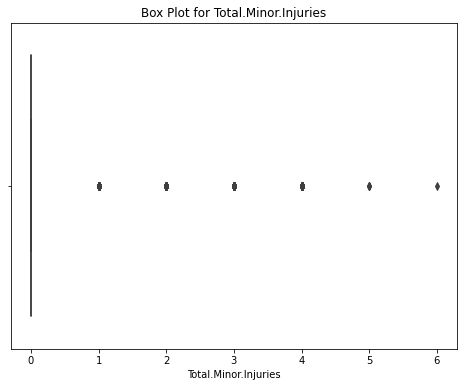

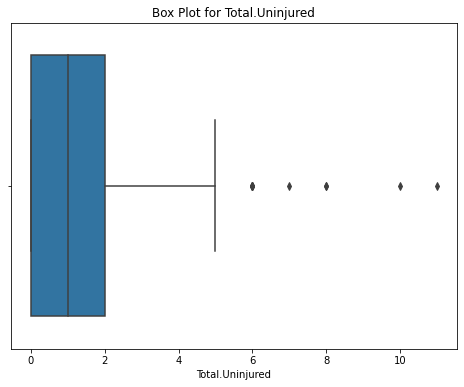

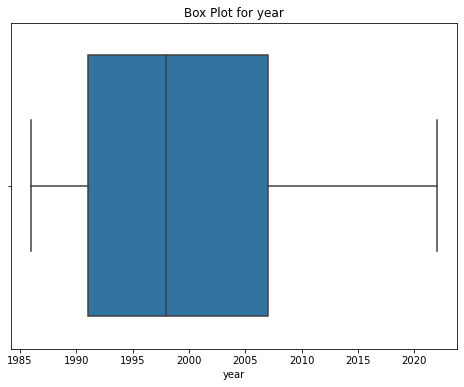

In [44]:
#Checking the numerical columns again to check for any other outliers.

# List of numerical columns to look for outliers.
outlier_columns = ['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'year']

# Create a box plot for each specified column
for column in outlier_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=planes_of_interest[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

The Cessna 152 and 172 are single engine planes, so I will change the value of number of engines to 1 to be consistent.

In [45]:
#Identifying Rows where the number of engines is equal to 2, and confirming the Make and model is consistent 
planes_of_interest[planes_of_interest['Number.of.Engines'] == 2]

#Reassinging the value to 1.
planes_of_interest.loc[planes_of_interest['Number.of.Engines'] == 2, 'Number.of.Engines'] = 1

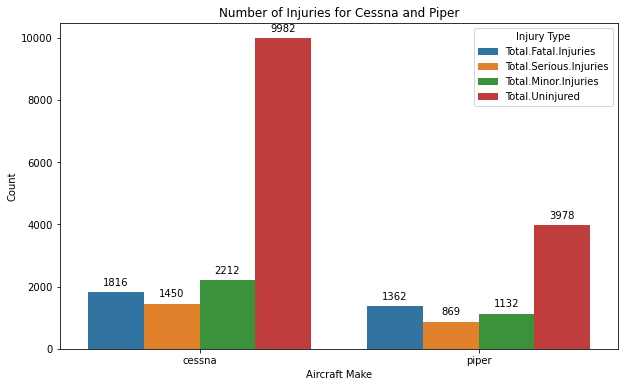

In [46]:

make_column = 'Make'
fatal_injuries_column = 'Total.Fatal.Injuries'
serious_injuries_column = 'Total.Serious.Injuries'
minor_injuries_column = 'Total.Minor.Injuries'
uninjured_column = 'Total.Uninjured'

# Group by 'Make' and sum the injuries
grouped_df = planes_of_interest.groupby(make_column).agg({
    fatal_injuries_column: 'sum',
    serious_injuries_column: 'sum',
    minor_injuries_column: 'sum',
    uninjured_column: 'sum'
}).reset_index()

# Melt the DataFrame for easier plotting
melted_df = pd.melt(grouped_df, id_vars=[make_column], var_name='Injury Type', value_name='Count')

# Create a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=make_column, y='Count', hue='Injury Type', data=melted_df)
plt.title('Number of Injuries for Cessna and Piper')
plt.xlabel('Aircraft Make')
plt.ylabel('Count')

# Display counts (formatted as integers) at the top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

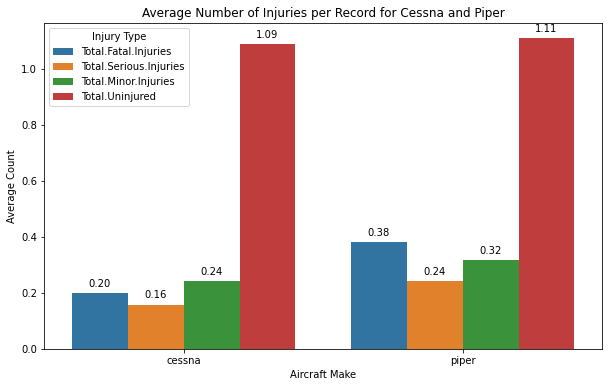

In [47]:

make_column = 'Make'
fatal_injuries_column = 'Total.Fatal.Injuries'
serious_injuries_column = 'Total.Serious.Injuries'
minor_injuries_column = 'Total.Minor.Injuries'
uninjured_column = 'Total.Uninjured'

# Group by 'Make' and calculate the average count of injuries per record
grouped_df = planes_of_interest.groupby(make_column).agg({
    fatal_injuries_column: 'mean',
    serious_injuries_column: 'mean',
    minor_injuries_column: 'mean',
    uninjured_column: 'mean'
}).reset_index()

# Melt the DataFrame for easier plotting
melted_df = pd.melt(grouped_df, id_vars=[make_column], var_name='Injury Type', value_name='Average Count')

# Create a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=make_column, y='Average Count', hue='Injury Type', data=melted_df)
plt.title('Average Number of Injuries per Record for Cessna and Piper')
plt.xlabel('Aircraft Make')
plt.ylabel('Average Count')

# Display counts at the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

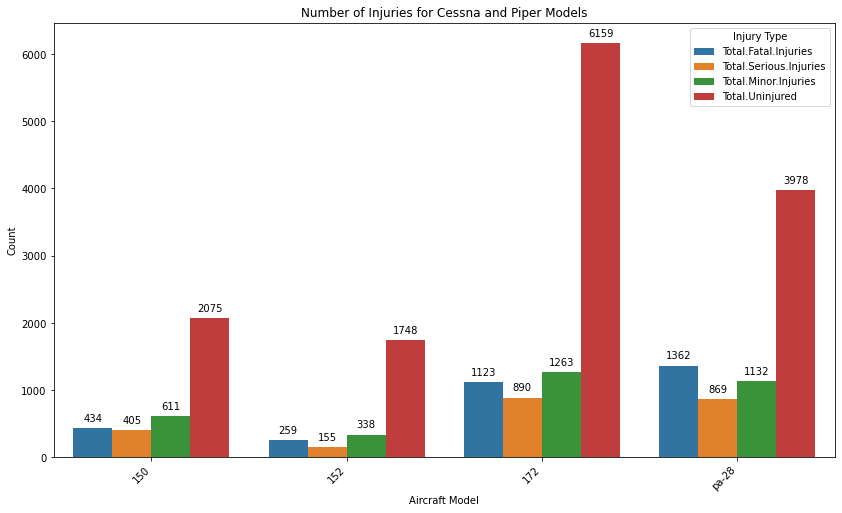

In [48]:

make_column = 'Make'
model_column = 'model_new'
fatal_injuries_column = 'Total.Fatal.Injuries'
serious_injuries_column = 'Total.Serious.Injuries'
minor_injuries_column = 'Total.Minor.Injuries'
uninjured_column = 'Total.Uninjured'



# Group by 'Make' and 'Model' and calculate the average count of injuries per record
grouped_df = planes_of_interest.groupby([make_column, model_column]).agg({
    fatal_injuries_column: 'sum',
    serious_injuries_column: 'sum',
    minor_injuries_column: 'sum',
    uninjured_column: 'sum'
}).reset_index()

# Melt the DataFrame for easier plotting
melted_df = pd.melt(grouped_df, id_vars=[make_column, model_column], var_name='Injury Type', value_name='Average Count')

# Create a bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=model_column, y='Average Count', hue='Injury Type', data=melted_df, ci=None)  # Set ci=None to remove error bars
plt.title('Number of Injuries for Cessna and Piper Models')
plt.xlabel('Aircraft Model')
plt.ylabel('Count')

# Display counts at the top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

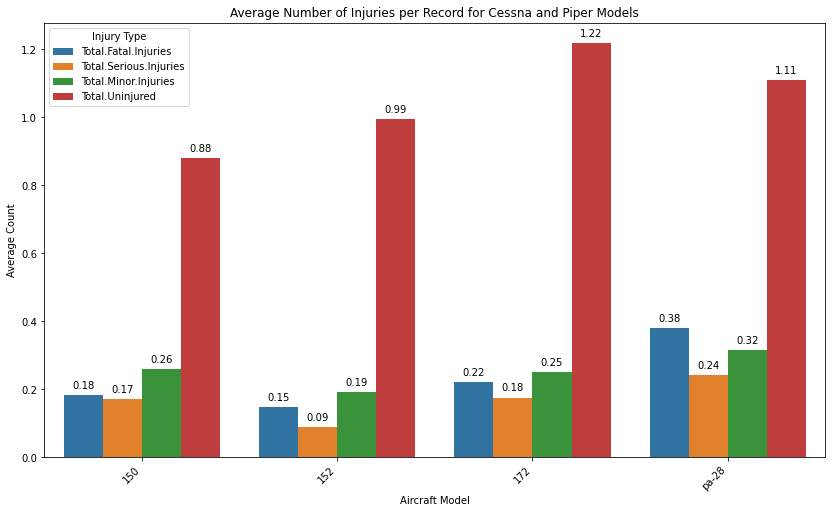

In [49]:

make_column = 'Make'
model_column = 'model_new'
fatal_injuries_column = 'Total.Fatal.Injuries'
serious_injuries_column = 'Total.Serious.Injuries'
minor_injuries_column = 'Total.Minor.Injuries'
uninjured_column = 'Total.Uninjured'



# Group by 'Make' and 'Model' and calculate the average count of injuries per record
grouped_df = planes_of_interest.groupby([make_column, model_column]).agg({
    fatal_injuries_column: 'mean',
    serious_injuries_column: 'mean',
    minor_injuries_column: 'mean',
    uninjured_column: 'mean'
}).reset_index()

# Melt the DataFrame for easier plotting
melted_df = pd.melt(grouped_df, id_vars=[make_column, model_column], var_name='Injury Type', value_name='Average Count')

# Create a bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=model_column, y='Average Count', hue='Injury Type', data=melted_df, ci=None)  # Set ci=None to remove error bars
plt.title('Average Number of Injuries per Record for Cessna and Piper Models')
plt.xlabel('Aircraft Model')
plt.ylabel('Average Count')

# Display counts at the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
 
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()